# Point Estimates

The sample mean is usually not exactly the same as the population mean. This difference can be caused by many factors including poor survey design, biased sampling methods and the randomness inherent to drawing a sample from a population. Let's investigate point estimates by generating a population of random age data and then drawing a sample from it to estimate the mean:

In [101]:
%matplotlib inline

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

In [102]:
np.random.seed(10)

population_ages1 = stats.poisson.rvs(size = 150000,mu = 35, loc = 18)
population_ages2 = stats.poisson.rvs(size = 100000,mu = 10, loc = 18)
population_ages = np.concatenate((population_ages1,population_ages2))
population_ages.mean()

43.002372

In [103]:
np.random.seed(6)

sample_ages = np.random.choice(population_ages, size = 12500)   # taking sample size = pop_size/20,.. n/20

sample_ages.mean()

42.82144

In [104]:
population_ages.mean() - sample_ages.mean()

0.18093199999999854

**The sample mean underestimates the population by 0.18 years**

In [105]:
random.seed(10)

population_races = (["white"]*100000) + (["black"]*50000) +\
                   (["hispanic"]*50000) + (["asian"]*25000) +\
                   (["other"]*25000)

demo_sample = random.sample(population_races, 1000)

In [106]:
pop_ratio = {}
for race in set(population_races):
    pop_ratio[race] = population_races.count(race)/250000

In [107]:
sample_ratio = {}
for race in set(demo_sample):
    sample_ratio[race] = demo_sample.count(race)/1000

In [108]:
pop_ratio

{'other': 0.1, 'black': 0.2, 'asian': 0.1, 'hispanic': 0.2, 'white': 0.4}

In [109]:
sample_ratio

{'other': 0.099,
 'black': 0.231,
 'asian': 0.099,
 'hispanic': 0.192,
 'white': 0.379}

**proportion estimates are close to population proportion**

# Sampling Distribution and the Central Limit Theorem 

In [110]:
population_ages.min()

18

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015AE2B51198>]],
      dtype=object)

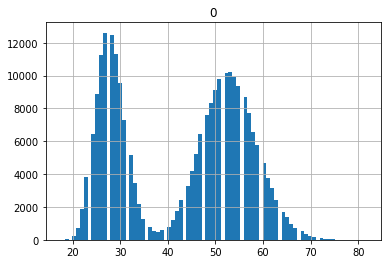

In [111]:
pd.DataFrame(population_ages).hist(bins = 80, range = (17.5,81.5))

In [112]:
stats.skew(population_ages)

-0.12008483603917186

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015AE2E44EB8>]],
      dtype=object)

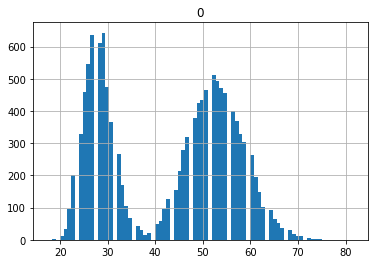

In [113]:
pd.DataFrame(sample_ages).hist(bins = 80, range = (17.5,81.5))

In [114]:
stats.skew(sample_ages)

-0.09065469341288682

The central limit theorem is one of the most important results of probability theory and serves as the foundation of many methods of statistical analysis. At a high level, the theorem states the distribution of many sample means, known as a sampling distribution, will be normally distributed. This rule holds even if the underlying distribution itself is not normally distributed. As a result we can treat the sample mean as if it were drawn normal distribution.

Lets try sampling distribution

In [115]:
#taking point estimates(mean) from population ages
point_estimates = []
for i in range(200):
    point_estimates.append(np.random.choice(population_ages, 1000).mean())

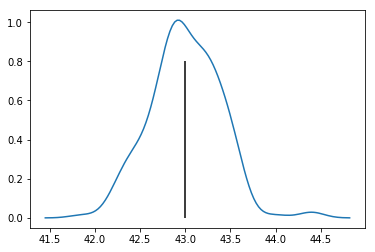

In [116]:
sns.distplot(point_estimates,hist = False)
plt.vlines(x=np.mean(point_estimates), ymin=0, ymax = 1)

The sampling distribution seems to be roughly normal

In [117]:
population_ages.mean() - np.mean(point_estimates)

0.00154699999999508

# Confidence Interval

We calculate the confidence interval using 95% confidence. i.e. alpha = 5. Its a two-tailed test. Hence q = 1-0.05/2 = 0.975

In [100]:
np.random.seed(10)
n = 1000
sample = np.random.choice(population_ages,n)
sample.mean()

42.523

In [93]:
z_critical = stats.norm.ppf(q = 0.975)

In [94]:
z_critical

1.959963984540054

In [95]:
pop_stddev = population_ages.std()

In [96]:
margin_of_error = z_critical * (pop_stddev / math.sqrt(n))

In [97]:
UCL = sample.mean() + margin_of_error
LCL = sample.mean() - margin_of_error

In [98]:
UCL

44.08193593117317

In [99]:
LCL

42.44206406882683

In [118]:
population_ages.mean()

43.002372

The Confidence intervals capture the population mean

In [120]:
np.random.seed(12)

intervals = []
sample_means = []

sample_size = 1000

for sample in range(25):
    
    sample = np.random.choice(population_ages, sample_size)
    s_mean = sample.mean()
    sample_means.append(s_mean)
    
    z_critical = stats.norm.ppf(0.975)
    
    pop_stddev = population_ages.std()
    
    margin_of_error =z_critical * pop_stddev / math.sqrt(sample_size)
    
    confidence_interval = (s_mean - margin_of_error, s_mean + margin_of_error)
    
    intervals.append(confidence_interval)

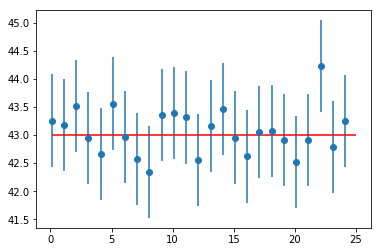

In [130]:
plt.figsize = (9,9)

plt.errorbar(x = np.arange(0.1, 25, 1),
             y = sample_means,
             yerr = [(top-bot)/2 for bot,top in intervals],
             fmt = 'o'
            )

plt.hlines(xmin = 0.1, xmax = 25, y =population_ages.mean(), color = 'red')

Almost 95% times the population mean is included in the confidence interval.

### Let's take a new, smaller sample and then create a confidence interval without the population standard deviation, using the t-distribution:

In [134]:
np.random.seed(10)


sample_size = 25
sample = np.random.choice(population_ages, sample_size)
sample_mean = sample.mean()

t_critical = stats.t.ppf(q = 0.975, df = 24)

sample_stddev = sample.std(ddof = 1)

margin_of_error = t_critical * sample_stddev/math.sqrt(sample_size)

interval  = [sample_mean - margin_of_error, sample_mean + margin_of_error]

In [136]:
t_critical

2.0638985616280205

In [135]:
interval

[37.65147508161371, 48.108524918386294]

In [140]:
stats.t.interval(alpha = 0.95, df = 24, loc = sample_mean, scale = sample_stddev/math.sqrt(sample_size))

(37.65147508161371, 48.108524918386294)

In [137]:
stats.t.ppf(q=0.975, df= 999) - stats.norm.ppf(0.975)  

0.0023774765933946007

Let's calculate a 95% confidence interval for Hispanics according to the sample proportion we calculated earlier (0.192):

In [143]:
pop_ratio

{'other': 0.1, 'black': 0.2, 'asian': 0.1, 'hispanic': 0.2, 'white': 0.4}

In [144]:
sample_ratio

{'other': 0.099,
 'black': 0.231,
 'asian': 0.099,
 'hispanic': 0.192,
 'white': 0.379}

In [152]:
z_critical = stats.norm.ppf(0.975)
p = sample_ratio['hispanic']

n = 1000 # sample size was taken as 1000

margin_of_error = z_critical * math.sqrt(p*(1-p)/n)

interval = [p - margin_of_error, p + margin_of_error]

interval

[0.16758794241348748, 0.21641205758651252]

In [153]:
stats.norm.interval(alpha = 0.95, loc = 0.192, scale = math.sqrt(p*(1-p)/n))

(0.16758794241348748, 0.21641205758651252)